<a href="https://colab.research.google.com/github/Nuwantha005/EN3150_Group_Assignment/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.4, batch_size=1024, verbose=2)



Epoch 1/10
36/36 - 34s - 952ms/step - accuracy: 0.2573 - loss: 2.2654 - val_accuracy: 0.3588 - val_loss: 2.2181
Epoch 2/10
36/36 - 34s - 954ms/step - accuracy: 0.4137 - loss: 2.1463 - val_accuracy: 0.5012 - val_loss: 2.0373
Epoch 3/10
36/36 - 42s - 1s/step - accuracy: 0.5654 - loss: 1.8985 - val_accuracy: 0.6221 - val_loss: 1.7087
Epoch 4/10
36/36 - 33s - 925ms/step - accuracy: 0.6643 - loss: 1.5196 - val_accuracy: 0.7319 - val_loss: 1.2808
Epoch 5/10
36/36 - 35s - 973ms/step - accuracy: 0.7673 - loss: 1.1069 - val_accuracy: 0.8125 - val_loss: 0.9032
Epoch 6/10
36/36 - 41s - 1s/step - accuracy: 0.8236 - loss: 0.7970 - val_accuracy: 0.8490 - val_loss: 0.6641
Epoch 7/10
36/36 - 45s - 1s/step - accuracy: 0.8569 - loss: 0.6089 - val_accuracy: 0.8735 - val_loss: 0.5262
Epoch 8/10
36/36 - 38s - 1s/step - accuracy: 0.8796 - loss: 0.4958 - val_accuracy: 0.8911 - val_loss: 0.4407
Epoch 9/10
36/36 - 61s - 2s/step - accuracy: 0.8940 - loss: 0.4227 - val_accuracy: 0.9022 - val_loss: 0.3833
Epoch 1

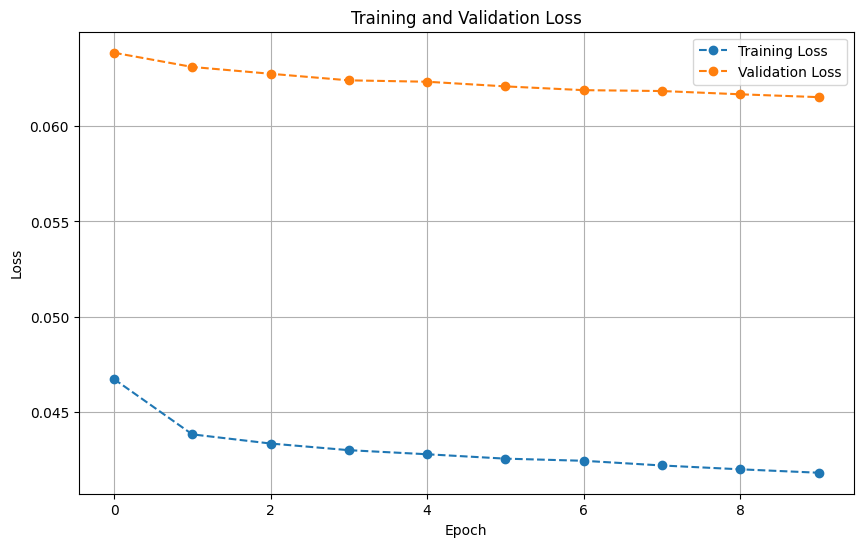

In [ ]:

import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9019 - loss: 0.3696
Test Loss: 0.32824578881263733
Test Accuracy: 0.9176999926567078
